<a href="https://colab.research.google.com/github/manavpatel7220/DogVsCatClassifier/blob/main/cat%26Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 23.2MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
#Genrators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [22]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.2340 - accuracy: 0.6033 - val_loss: 0.6778 - val_accuracy: 0.6130
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5911 - accuracy: 0.6977 - val_loss: 0.5279 - val_accuracy: 0.7372
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5020 - accuracy: 0.7566 - val_loss: 0.5257 - val_accuracy: 0.7562
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4355 - accuracy: 0.7940 - val_loss: 0.4596 - val_accuracy: 0.7986
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3692 - accuracy: 0.8334 - val_loss: 0.4576 - val_accuracy: 0.7882
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3049 - accuracy: 0.8662 - val_loss: 0.5958 - val_accuracy: 0.8046
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2299 - accuracy: 0.9006 - val_loss: 0.5073 - val_ac

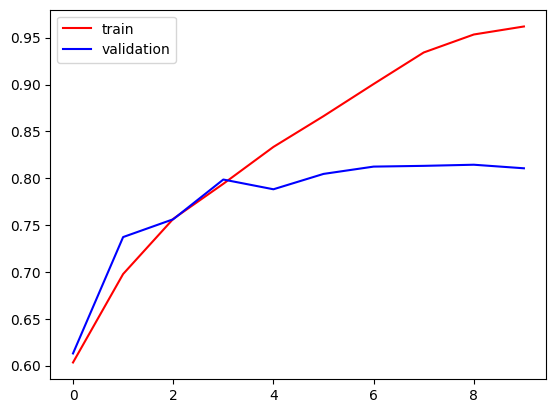

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


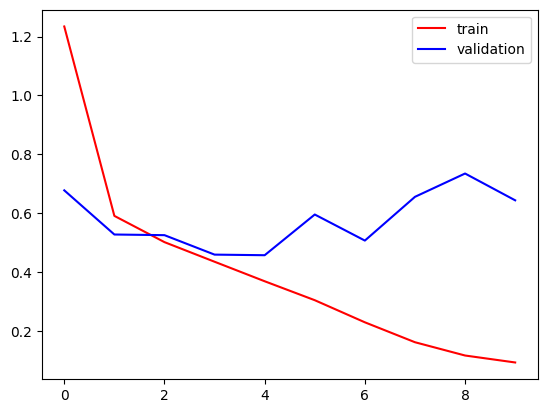

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
# ways to reduce overfitting

#add more data
#Data augmentation
#L1/L2 regularizer
#Dropout
#batch norm
#reduce complexity


In [37]:
import cv2

In [38]:
# test_img= cv2.imread('/content/train/cat.1.jpg')


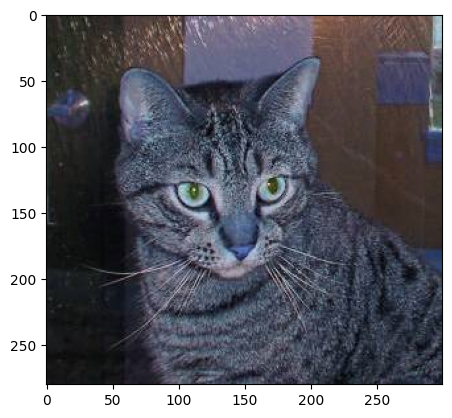

In [39]:
# plt.imshow(test_img)

In [50]:
# test_img.shape

(256, 256, 3)

In [41]:
# test_img = cv2.resize(test_img,(256,256))

In [42]:
# test_input = test_img.reshape((1,256,256,3))


In [43]:
# model.predict(test_input)

1/1 [==============================] - 0s 499ms/step


array([[1.]], dtype=float32)

In [51]:
test_img= cv2.imread('/content/train/dog.67.jpg')


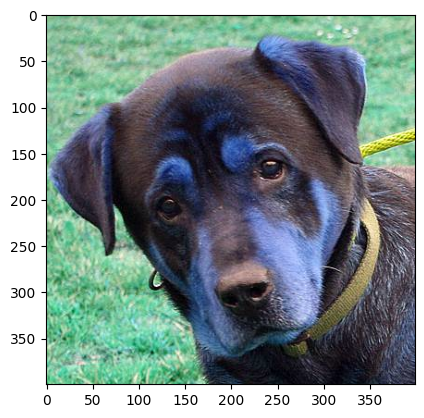

In [52]:
plt.imshow(test_img)

In [53]:
test_img.shape

(400, 399, 3)

In [54]:
test_img = cv2.resize(test_img,(256,256))

In [55]:
test_input = test_img.reshape((1,256,256,3))


In [56]:

model.predict(test_input)


1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)